# Complete using CNN

### Import Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [7]:
from sklearn.utils import shuffle
from skimage.transform import resize
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn import metrics

### collect paths



In [2]:
damage=glob('damage/*.jpeg')
no_damage=glob('no_damage/*.jpeg')

### define classes amd labels



In [3]:
dic={0:'damge',1:'no_damge'}

### load and label images for each category

In [4]:
labels=[]
images=[]

for i in damage:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in no_damage:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

### plot images

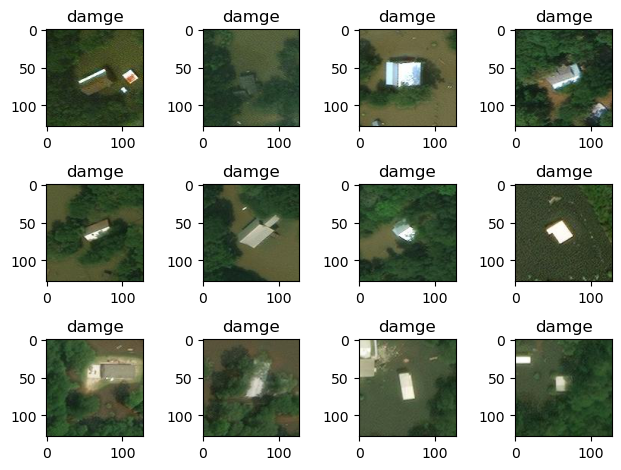

In [5]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### shuffle

In [8]:
images,labels=shuffle(images,labels)

### plot images

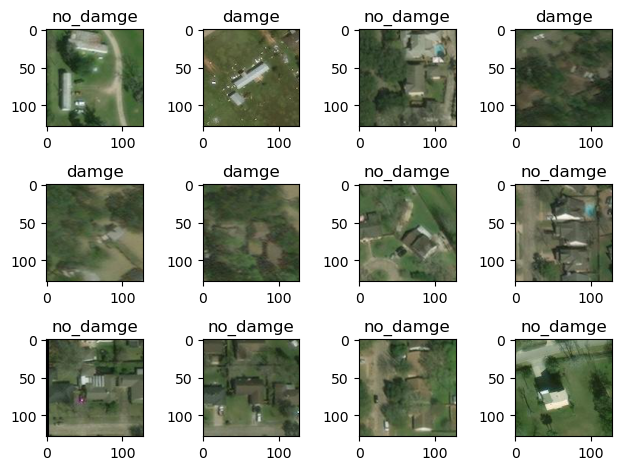

In [9]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### resize images

In [10]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))
    

### plot after resizing

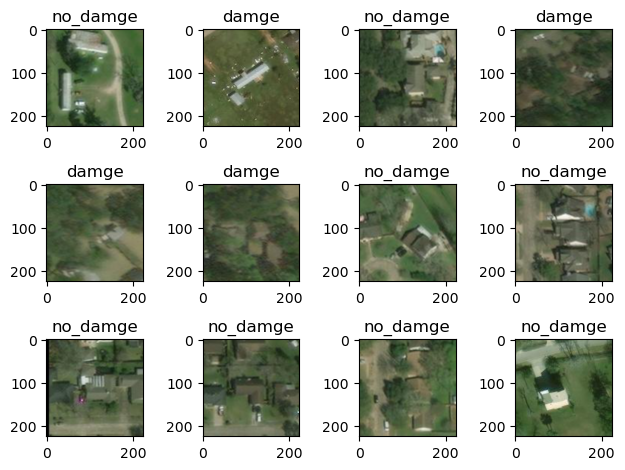

In [11]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### convert into numpy

In [33]:
X=np.array(X)
y=np.array(labels)

### spit the data

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### build model

In [35]:
model=Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    
    layers.Dense(123,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

### compile

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### train



In [37]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
48/48 [==============================] - 37s 544ms/step - loss: 0.6527 - accuracy: 0.6270 - val_loss: 0.5199 - val_accuracy: 0.8250
Epoch 2/10
48/48 [==============================] - 22s 450ms/step - loss: 0.4544 - accuracy: 0.8303 - val_loss: 0.4395 - val_accuracy: 0.8625
Epoch 3/10
48/48 [==============================] - 22s 450ms/step - loss: 0.3472 - accuracy: 0.8770 - val_loss: 0.3639 - val_accuracy: 0.8625
Epoch 4/10
48/48 [==============================] - 22s 450ms/step - loss: 0.2449 - accuracy: 0.9151 - val_loss: 0.4563 - val_accuracy: 0.8250
Epoch 5/10
48/48 [==============================] - 22s 457ms/step - loss: 0.1687 - accuracy: 0.9414 - val_loss: 0.4675 - val_accuracy: 0.8750
Epoch 6/10
48/48 [==============================] - 22s 451ms/step - loss: 0.0924 - accuracy: 0.9704 - val_loss: 0.5437 - val_accuracy: 0.8375
Epoch 7/10
48/48 [==============================] - 22s 449ms/step - loss: 0.0541 - accuracy: 0.9882 - val_loss: 0.5230 - val_accuracy: 0.8625

### model prediction

In [38]:
y_pred=model.predict(X_test)

13/13 [==============================] - 1s 97ms/step


In [39]:
y_pred=[np.argmax(i) for i in y_pred]

### accuracy score

In [40]:
print(metrics.accuracy_score(y_test,y_pred))

0.4875


### confusion matrix

<Axes: >

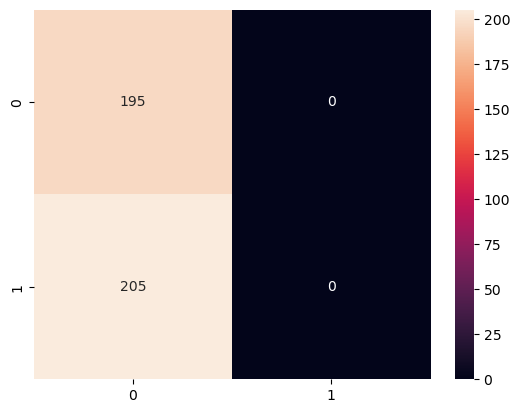

In [42]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### classification report

In [43]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       195
           1       0.00      0.00      0.00       205

    accuracy                           0.49       400
   macro avg       0.24      0.50      0.33       400
weighted avg       0.24      0.49      0.32       400



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
